# **Plagiarism Checker AI**
Dataset:https://www.kaggle.com/datasets/ruvelpereira/mit-plagairism-detection-dataset

**STEP 1:Import the libraries**


In [21]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2: Load the TXT file into a DataFrame**

In [22]:
file_path = 'sample_data/dataset/original/train_snli.txt'  # 🔁 Replace with your file path

df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence1', 'sentence2', 'label'])

print("✅ Loaded Dataset:")
print(df.head())

✅ Loaded Dataset:
                                           sentence1  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2              Children smiling and waving at camera   
3              Children smiling and waving at camera   
4  A boy is jumping on skateboard in the middle o...   

                                       sentence2  label  
0  A person is at a diner, ordering an omelette.      0  
1              A person is outdoors, on a horse.      1  
2                     There are children present      1  
3                          The kids are frowning      0  
4              The boy skates down the sidewalk.      0  


 **STEP 3: Data Preprocessing**

In [23]:
def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['sentence1_clean'] = df['sentence1'].apply(clean_text)
df['sentence2_clean'] = df['sentence2'].apply(clean_text)

**STEP 4: Data Visualization**

<ipython-input-24-74dedf38b781>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


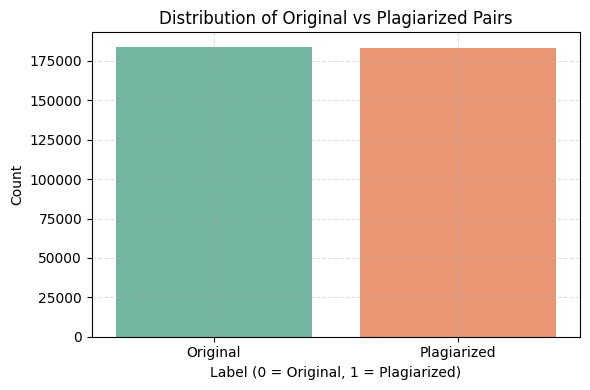

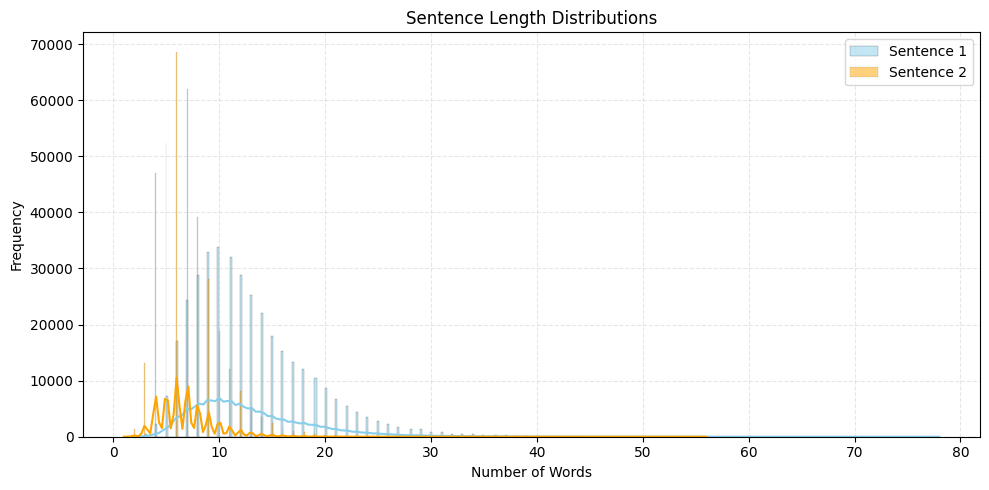

In [24]:
# Plot 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Original vs Plagiarized Pairs')
plt.xlabel('Label (0 = Original, 1 = Plagiarized)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Original', 'Plagiarized'])
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot 2: Sentence Lengths
df['s1_len'] = df['sentence1'].apply(lambda x: len(str(x).split()))
df['s2_len'] = df['sentence2'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['s1_len'], color='skyblue', label='Sentence 1', kde=True)
sns.histplot(df['s2_len'], color='orange', label='Sentence 2', kde=True)
plt.title('Sentence Length Distributions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**STEP 5: TF-IDF Vectorization on both sentence1 and sentence2**

In [25]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)

# Combine both sentence columns for fitting the TF-IDF model
combined_corpus = pd.concat([df['sentence1_clean'], df['sentence2_clean']], axis=0)
vectorizer.fit(combined_corpus)

# Transform sentences
s1_tfidf = vectorizer.transform(df['sentence1_clean'])
s2_tfidf = vectorizer.transform(df['sentence2_clean'])

# Combine both vectors
from scipy.sparse import hstack
X = hstack([s1_tfidf, s2_tfidf])
y = df['label']

**STEP 6: Train,Test and Split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **STEP 7: Train Logistic Regression Model**

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**STEP 8: Model Evaluation**

In [28]:
# STEP 7: Evaluation
y_pred = model.predict(X_test)

print("\n🎯 Accuracy Results")
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy Results
Training Accuracy: 0.7379328882809683
Testing Accuracy: 0.7117931269139163

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71     36795
           1       0.70      0.73      0.72     36680

    accuracy                           0.71     73475
   macro avg       0.71      0.71      0.71     73475
weighted avg       0.71      0.71      0.71     73475



 **STEP 9: Predict on new sentence pair**

In [29]:
def check_plagiarism_pair(s1, s2):
    s1_clean = clean_text(s1)
    s2_clean = clean_text(s2)
    s1_vec = vectorizer.transform([s1_clean])
    s2_vec = vectorizer.transform([s2_clean])
    combined = hstack([s1_vec, s2_vec])
    pred = model.predict(combined)[0]
    return "Plagiarized" if pred == 1 else "Original"


**STEP 10: Check the model**

In [32]:
s1 = "A person is riding a horse over a broken airplane."
s2 = "A person is outdoors, on a horse."
print("\nSample Check:")
print(f"Sentence 1: {s1}")
print(f"Sentence 2: {s2}")
print("Prediction:", check_plagiarism_pair(s1, s2))



Sample Check:
Sentence 1: A person is riding a horse over a broken airplane.
Sentence 2: A person is outdoors, on a horse.
Prediction: Plagiarized
